In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)
from keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv("timeseries_salesdata.csv")
data.set_index("Date", inplace =True)
valid = pd.read_csv(r'dec.csv')

In [3]:
validate = data['Sales'].tail(96)
validate = validate.values
test = pd.DataFrame(data['Sales'].tail(93))

In [4]:
train = data["Sales"].iloc[:-96]
uni_data= train

In [5]:
uni_data = uni_data.values
len(uni_data)

900

In [6]:
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
raw_seq = uni_data
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 1
n_steps = 3


X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))


In [7]:
# split a univariate sequence into samples
from numpy import array
def split_sequence2(sequence2, n_steps2):
    X2, y2 = list(), list()
    for i in range(len(sequence2)):
# find the end of this pattern
        end_ix2 = i + n_steps2
        # check if we are beyond the sequence
        if end_ix2 > len(sequence2)-1:
            break
        # gather input and output parts of the pattern
        seq_x2, seq_y2 = sequence2[i:end_ix2], sequence2[end_ix2]
        X2.append(seq_x2)
        y2.append(seq_y2)
    return array(X2), array(y2)

# define input sequence
raw_seq2 = validate
# choose a number of time steps
n_steps2 = 3
# split into samples
X2, y2 = split_sequence2(raw_seq2, n_steps2)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 1
n_steps = 3


X2 = X2.reshape((X2.shape[0], n_seq, 1, n_steps2, n_features))

In [8]:
print(X.shape)
print(y.shape)
print(X2.shape)
print(y2.shape)

(897, 1, 1, 3, 1)
(897,)
(93, 1, 1, 3, 1)
(93,)


In [9]:
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=100, batch_size=30, verbose=1, validation_data=(X2,y2),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)


Epoch 1/100
30/30 [==============================] - 81s 163ms/step - loss: 14204513.4839 - val_loss: 54099572.0000
Epoch 2/100
30/30 [==============================] - 1s 19ms/step - loss: 9816465.4355 - val_loss: 31491782.0000
Epoch 3/100
30/30 [==============================] - 1s 23ms/step - loss: 5310123.0645 - val_loss: 19929834.0000
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 3355842.1532 - val_loss: 18754588.0000
Epoch 5/100
30/30 [==============================] - 1s 22ms/step - loss: 3112708.0806 - val_loss: 18878330.0000
Epoch 6/100
30/30 [==============================] - 1s 20ms/step - loss: 3056545.2984 - val_loss: 18566098.0000
Epoch 7/100
30/30 [==============================] - 1s 23ms/step - loss: 3029674.6573 - val_loss: 18480016.0000
Epoch 8/100
30/30 [==============================] - 0s 17ms/step - loss: 2996058.8185 - val_loss: 18745532.0000
Epoch 9/100
30/30 [==============================] - 0s 15ms/step - loss: 2995891.8427 - val_

In [10]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('ConvLSTM model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 2, 64)          33536     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________


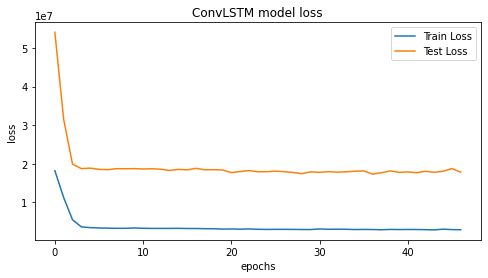

In [12]:
train_score = model.evaluate(X, y, verbose=0)
#print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
#% (np.sqrt(train_score[1]), train_score[2]))
#test_score = model.evaluate(X_test, test_set, verbose=0)
#print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
#% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)

In [13]:
pred = model.predict(X2)
print(len(pred))
foreConvLSTM= pd.DataFrame(pred)
foreConvLSTM.to_csv(r"C:\Users\cash\Desktop\tafa\Forecasting and Predicriom Notebooks&Datasets RJ\exported_ConvLSTMforecasts_dataframe.csv",index = False,header=True)

93


In [15]:
actual_fore=test.rename(columns={"Sales":"Actual Sales"})
actual_fore["ConvLSTM"]=foreConvLSTM.values
ConvLSTM=actual_fore
ConvLSTM

,Actual Sales,ConvLSTM
Date,,
30-Sep-20,6561.50,4925.681641
1-Oct-20,4599.50,5869.018555
2-Oct-20,4983.00,4083.654541
3-Oct-20,16826.00,4813.206543
4-Oct-20,28484.00,8434.786133
...,...,...
27-Dec-20,3116.25,2362.259277
28-Dec-20,7736.05,2955.936035
29-Dec-20,6981.61,4334.067383


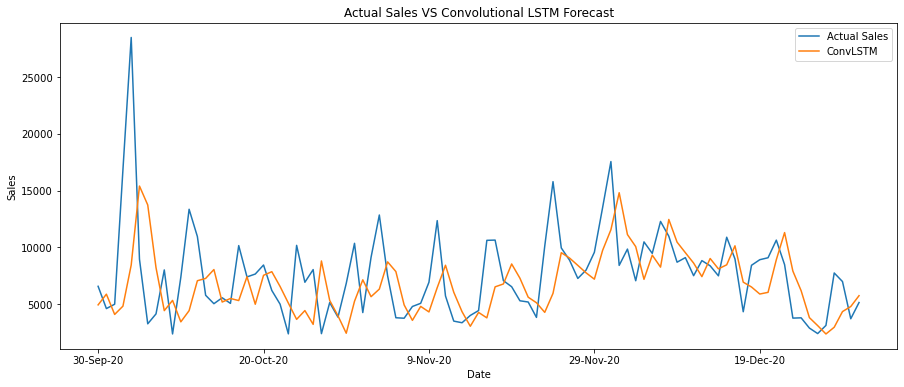

In [16]:
from matplotlib import pyplot
ConvLSTM['Actual Sales'].plot(figsize=(15,6),label="Actual Sales")
ConvLSTM['ConvLSTM'].plot(figsize=(15,6), label = "ConvLSTM")
pyplot.xlabel("Date")
pyplot.ylabel("Sales")
pyplot.title("Actual Sales VS Convolutional LSTM Forecast")
pyplot.legend()
pyplot.savefig("series plot.png")
pyplot.show()

In [17]:
y_true1 = ConvLSTM["Actual Sales"].dropna()
y_pred1 = ConvLSTM["ConvLSTM"].dropna()

In [18]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
print(timeseries_evaluation_metrics_func(y_true1, y_pred1))

Evaluation metric results:-
MSE is : 17846009.226177927
MAE is : 2964.4695401755707
RMSE is : 4224.45371926098
MAPE is : 42.12469073900748
R2 is : -0.17128670505987076

None
